In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
trainDS = pd.read_csv('titanic_train.csv')

In [78]:
trainDS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

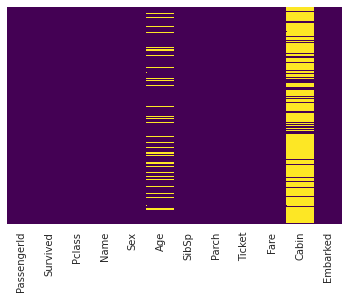

In [79]:
#check null inputs using heatmaps
sns.heatmap(trainDS.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [80]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

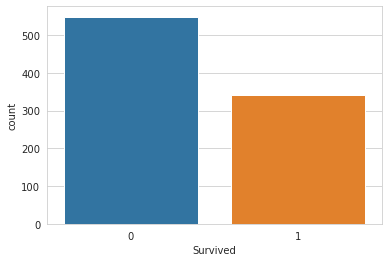

In [81]:
sns.countplot(x='Survived', data=trainDS)

<AxesSubplot:xlabel='Survived', ylabel='count'>

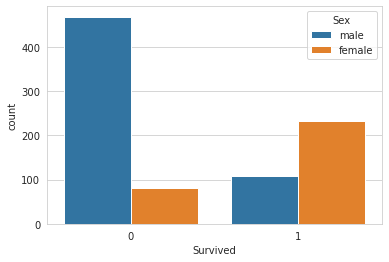

In [82]:
sns.countplot(x='Survived', hue='Sex', data=trainDS)

<AxesSubplot:xlabel='Survived', ylabel='count'>

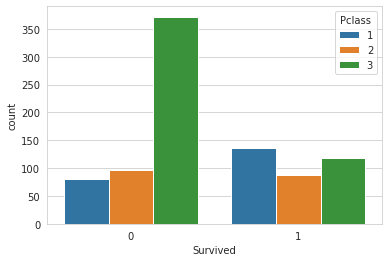

In [83]:
sns.countplot(x='Survived', hue='Pclass', data=trainDS)

<AxesSubplot:xlabel='Age', ylabel='Count'>

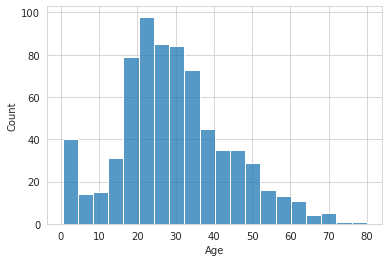

In [84]:
data.head()sns.histplot(trainDS['Age'].dropna())

<AxesSubplot:xlabel='Age', ylabel='Count'>

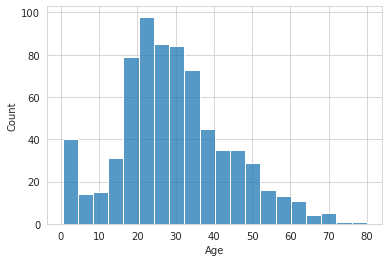

In [85]:
 sns.histplot(trainDS['Age'])

In [86]:
trainDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
import cufflinks as cf
cf.go_offline()

In [88]:
trainDS['Fare'].iplot(kind='hist', bins=30)

### clean data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

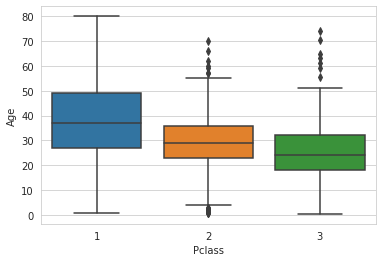

In [89]:
## chage age trends to class using boxplot
sns.boxplot(x='Pclass', y='Age', data=trainDS)

In [90]:
trainDS[trainDS['Pclass']==1]['Age'].mean()

38.233440860215055

In [91]:
trainDS[trainDS['Pclass']==2]['Age'].mean()

29.87763005780347

In [92]:
trainDS[trainDS['Pclass']==3]['Age'].mean()

25.14061971830986

In [93]:
def fix_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 30
        if Pclass == 3:
            return 25
    else:
        return Age

In [94]:
trainDS['Age'] = trainDS[['Age','Pclass']].apply(fix_age, axis=1)

<AxesSubplot:>

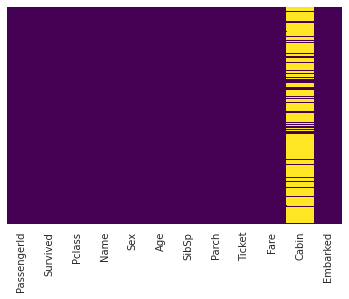

In [95]:
#check null inputs using heatmaps
sns.heatmap(trainDS.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [96]:
#drop cabin column
trainDS.drop('Cabin', axis=1, inplace=True)

In [97]:
trainDS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

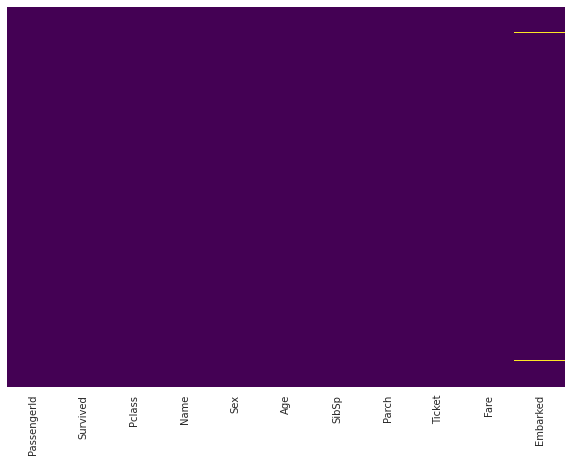

In [98]:
#check null inputs using heatmaps
plt.figure(figsize=(10,7))
sns.heatmap(trainDS.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [99]:
trainDS.dropna(inplace=True)

<AxesSubplot:>

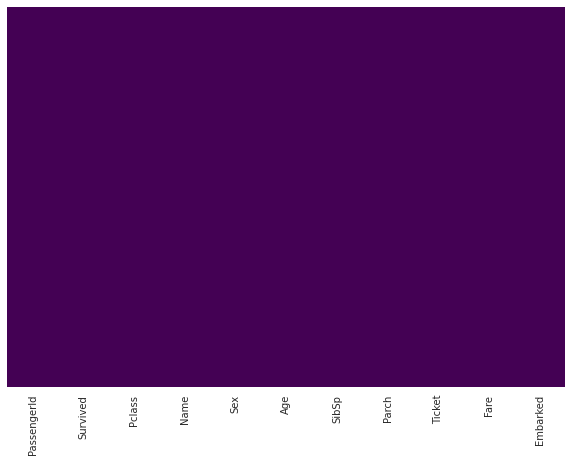

In [100]:
plt.figure(figsize=(10,7))
sns.heatmap(trainDS.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [101]:
#we good to go!!!!!!!!!!!

In [102]:
# Create a dummy variable for sex and embarked with pandas
pd.get_dummies(trainDS['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [103]:
#We dont need the two columns since if one is 0 then the other is 1
# We fix that using drop_first argument
sex = pd.get_dummies(trainDS['Sex'], drop_first=True)

In [104]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [105]:
embarked = pd.get_dummies(trainDS['Embarked'], drop_first=True)

In [106]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [107]:
train = pd.concat([trainDS, sex, embarked], axis=1)

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [109]:
train.drop(['Name','Sex','Embarked','Ticket'], axis=1, inplace=True)

In [110]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [111]:
trainDS.drop('PassengerId', axis=1, inplace=True)

In [112]:
trainDS.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

### Logistic Regression Model

In [113]:
# separate x and y
x = train.drop('Survived', axis=1)
y = train['Survived']

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [118]:
from sklearn.linear_model import LogisticRegression
lrModel = LogisticRegression(max_iter=1000)

In [119]:
lrModel.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [120]:
predictions = lrModel.predict(x_test)

In [121]:
from sklearn.metrics import classification_report

In [122]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       163
           1       0.84      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
print(confusion_matrix(y_test, predictions))

[[149  14]
 [ 32  72]]
